In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('datasets/clean_web_traffic.csv')

In [17]:
df.head(20)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
5,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,74.0,39.0,11.0,55.0,71.0,44.0,25.0,39.0,25.0,50.0
6,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,53.0,107.0,63.0,42.0,24.0,44.0,33.0,52.0,21.0,48.0
7,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,20.0,16.0,22.0,19.0,21.0,32.0,34.0,29.0,23.0,25.0
8,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...,2.0,1.0,4.0,4.0,2.0,6.0,3.0,6.0,9.0,...,10.0,13.0,8.0,16.0,6.0,12.0,6.0,8.0,6.0,13.0
9,All_your_base_are_belong_to_us_zh.wikipedia.or...,2.0,5.0,5.0,1.0,3.0,3.0,5.0,3.0,17.0,...,7.0,4.0,5.0,10.0,7.0,4.0,2.0,6.0,2.0,22.0


In [18]:
# Display the first few rows of the DataFrame
print(df.head())

# Get the dimensions of the DataFrame
print(df.shape)

# Basic information about the dataset
print(df.info())


                                         Page  2015-07-01  2015-07-02  \
0     2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1      2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2       3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3  4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4     5566_zh.wikipedia.org_all-access_spider        12.0         7.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         4.0         5.0        20.0         8.0         5.0        17.0   

   2015-07-09  ...  2017-09-01  2017-09-02  2017-09-03  2017-09-04  \
0        26.0  ...        19

In [19]:
# Summary statistics for numerical columns
print(df.describe())


         2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  5.332000e+04  5.332000e+04  5.332000e+04  5.332000e+04  5.332000e+04   
mean   1.496596e+03  1.493440e+03  1.399452e+03  1.448845e+03  1.497261e+03   
std    1.035063e+05  1.056857e+05  9.868170e+04  1.035562e+05  1.056356e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.500000e+01  2.400000e+01  2.200000e+01  2.300000e+01  2.300000e+01   
50%    1.240000e+02  1.230000e+02  1.190000e+02  1.160000e+02  1.270000e+02   
75%    4.690000e+02  4.660000e+02  4.530000e+02  4.460000e+02  4.900000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  5.332000e+04  5.332000e+04  5.332000e+04  5.332000e+04  5.332000e+04   
mean   1.645054e+03  1.571083e+03  1.490784e+03  1.519478e+03  1.508246e+03   
std    1.164208e+05  1.087236e+05  9.694588e+04  1.

### The dataset is to big for our machines. We will only pick 10 pages but keep all the dates

In [20]:
file_path = 'datasets/clean_web_traffic.csv'
random.seed(42)  
df = pd.read_csv(file_path)
selected_pages = random.sample(list(df['Page']), 10)
df = df[df['Page'].isin(selected_pages)]
df = df.set_index('Page').transpose()
df

Page,閃靈樂團_zh.wikipedia.org_all-access_spider,Nord_et_Sud_(mini-série)_fr.wikipedia.org_desktop_all-agents,Dipa_Karmakar_en.wikipedia.org_desktop_all-agents,Chile_national_football_team_en.wikipedia.org_desktop_all-agents,География_ru.wikipedia.org_mobile-web_all-agents,MediaWiki/tr_www.mediawiki.org_all-access_all-agents,Fran_Drescher_fr.wikipedia.org_all-access_all-agents,Valérie_Damidot_fr.wikipedia.org_mobile-web_all-agents,狎鷗亭白夜_zh.wikipedia.org_desktop_all-agents,陳子玄_zh.wikipedia.org_desktop_all-agents
2015-07-01,12.0,109.0,9.0,4089.0,52.0,113.0,131.0,51.0,37.0,86.0
2015-07-02,15.0,70.0,7.0,2436.0,75.0,77.0,172.0,68.0,27.0,77.0
2015-07-03,12.0,77.0,8.0,2445.0,55.0,104.0,159.0,48.0,39.0,55.0
2015-07-04,11.0,61.0,8.0,11080.0,37.0,86.0,127.0,47.0,29.0,58.0
2015-07-05,14.0,583.0,8.0,12446.0,59.0,73.0,130.0,301.0,32.0,63.0
...,...,...,...,...,...,...,...,...,...,...
2017-09-06,16.0,21.0,252.0,2264.0,1901.0,102.0,81.0,174.0,41.0,340.0
2017-09-07,40.0,27.0,130.0,1138.0,1829.0,87.0,133.0,86.0,36.0,239.0
2017-09-08,15.0,29.0,127.0,750.0,963.0,144.0,261.0,74.0,20.0,349.0
2017-09-09,11.0,45.0,91.0,534.0,704.0,102.0,139.0,82.0,23.0,533.0


In [21]:
df.head(8)

Page,閃靈樂團_zh.wikipedia.org_all-access_spider,Nord_et_Sud_(mini-série)_fr.wikipedia.org_desktop_all-agents,Dipa_Karmakar_en.wikipedia.org_desktop_all-agents,Chile_national_football_team_en.wikipedia.org_desktop_all-agents,География_ru.wikipedia.org_mobile-web_all-agents,MediaWiki/tr_www.mediawiki.org_all-access_all-agents,Fran_Drescher_fr.wikipedia.org_all-access_all-agents,Valérie_Damidot_fr.wikipedia.org_mobile-web_all-agents,狎鷗亭白夜_zh.wikipedia.org_desktop_all-agents,陳子玄_zh.wikipedia.org_desktop_all-agents
2015-07-01,12.0,109.0,9.0,4089.0,52.0,113.0,131.0,51.0,37.0,86.0
2015-07-02,15.0,70.0,7.0,2436.0,75.0,77.0,172.0,68.0,27.0,77.0
2015-07-03,12.0,77.0,8.0,2445.0,55.0,104.0,159.0,48.0,39.0,55.0
2015-07-04,11.0,61.0,8.0,11080.0,37.0,86.0,127.0,47.0,29.0,58.0
2015-07-05,14.0,583.0,8.0,12446.0,59.0,73.0,130.0,301.0,32.0,63.0
2015-07-06,4.0,215.0,15.0,5889.0,44.0,76.0,170.0,62.0,82.0,84.0
2015-07-07,7.0,96.0,9.0,3489.0,65.0,115.0,135.0,200.0,75.0,72.0
2015-07-08,14.0,76.0,7.0,2923.0,37.0,144.0,128.0,58.0,52.0,67.0


/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38275 (\N{CJK UNIFIED IDEOGRAPH-9583}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38728 (\N{CJK UNIFIED IDEOGRAPH-9748}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22296 (\N{CJK UNIFIED IDEOGRAPH-5718}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/c

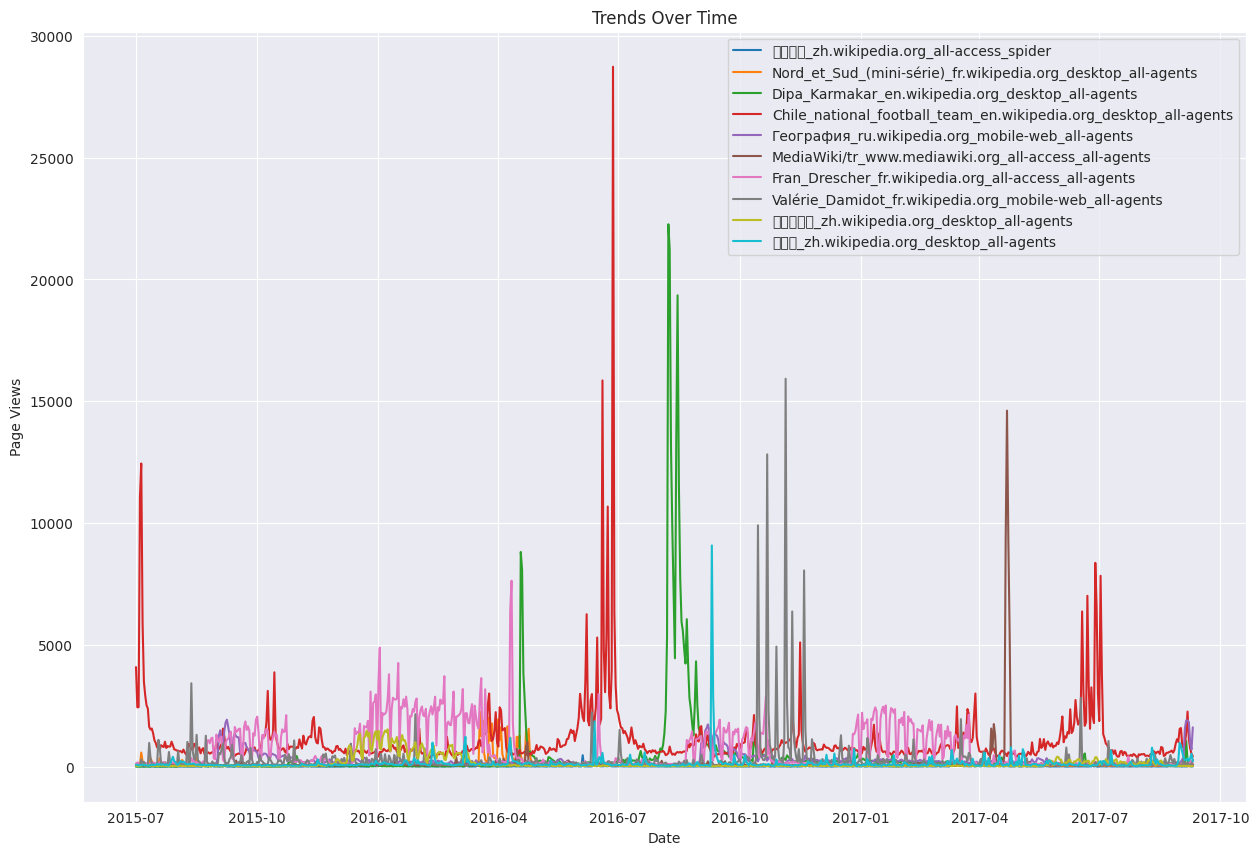

/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 38275 (\N{CJK UNIFIED IDEOGRAPH-9583}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 38728 (\N{CJK UNIFIED IDEOGRAPH-9748}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 22296 (\N{CJK UNIFIED IDEOGRAPH-5718}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 29390 (\N{CJK UNIFIED IDEOGRAPH-72CE}) missing from current font.
  fig.canvas.draw()
/home/meril/Doc

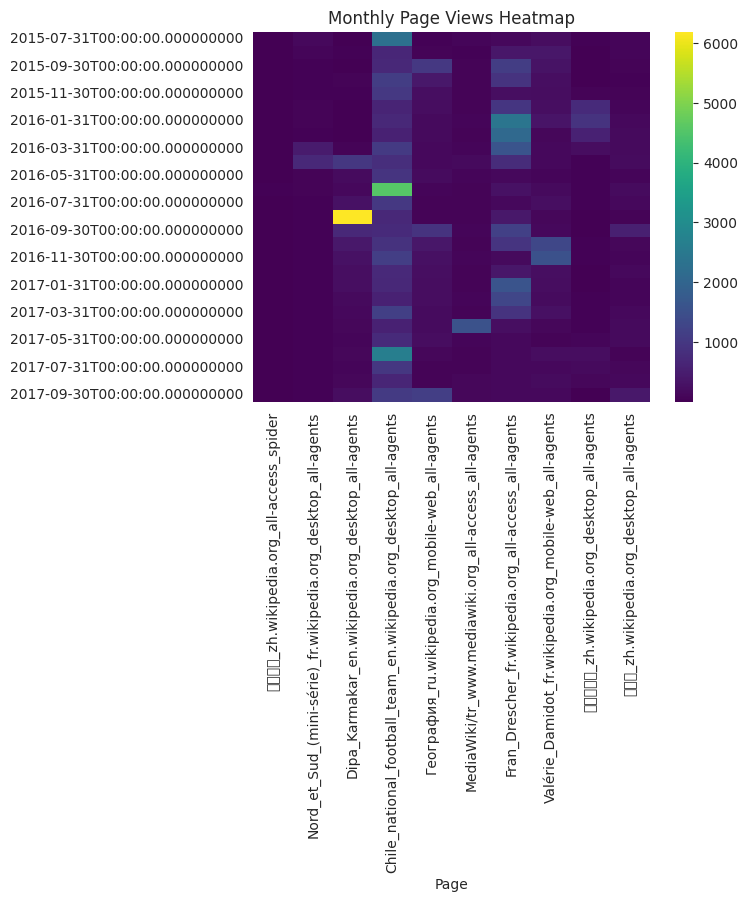

/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38275 (\N{CJK UNIFIED IDEOGRAPH-9583}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38728 (\N{CJK UNIFIED IDEOGRAPH-9748}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22296 (\N{CJK UNIFIED IDEOGRAPH-5718}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


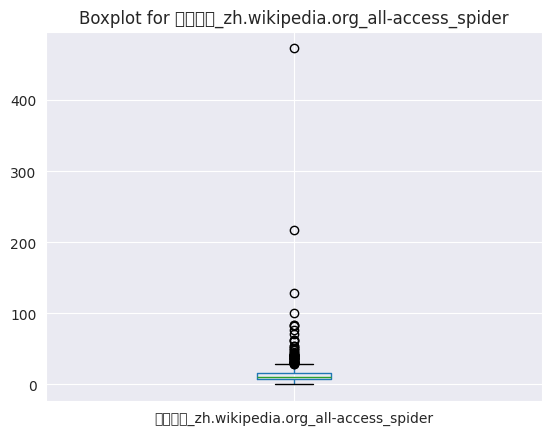

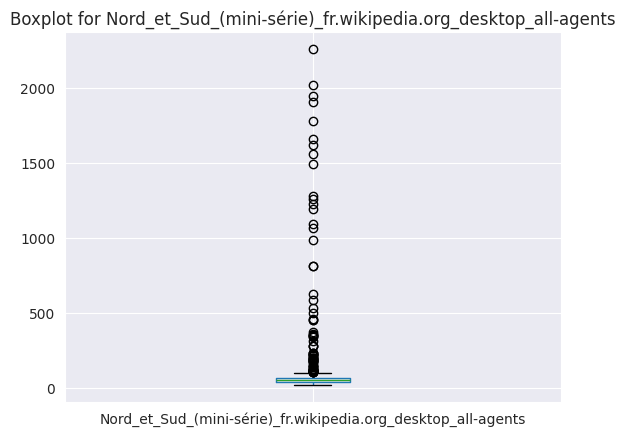

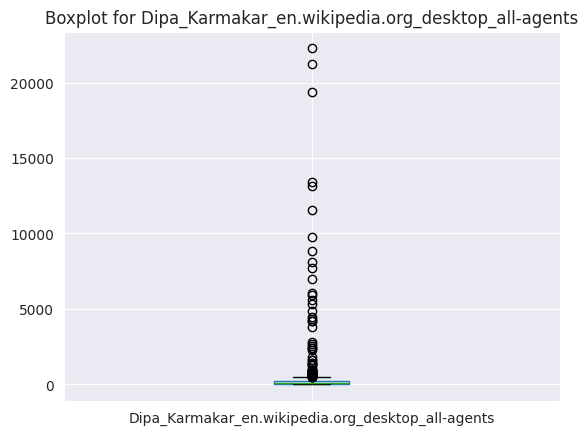

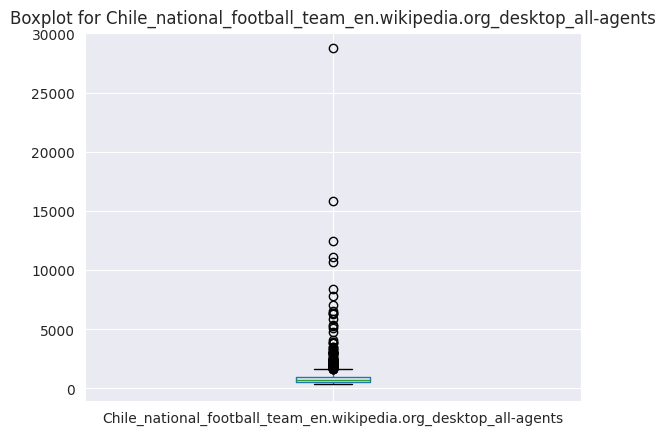

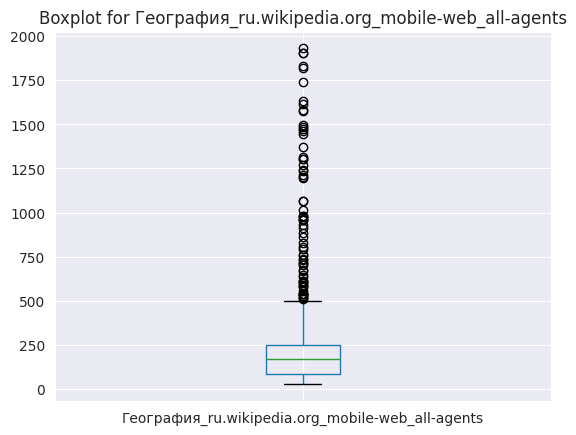

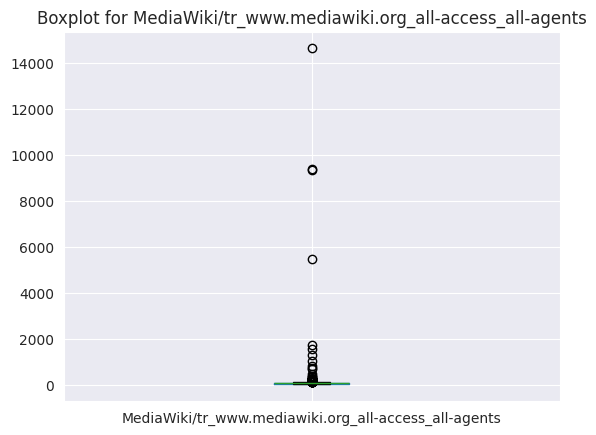

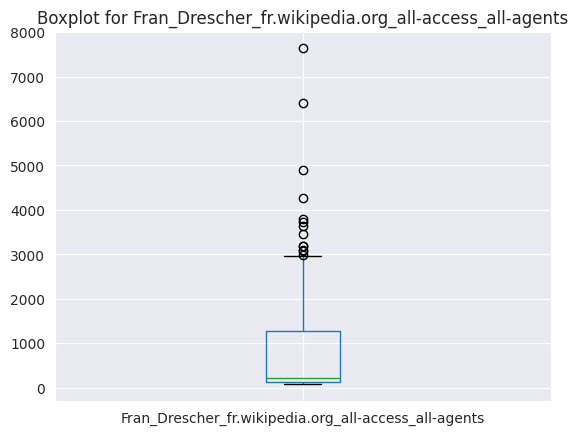

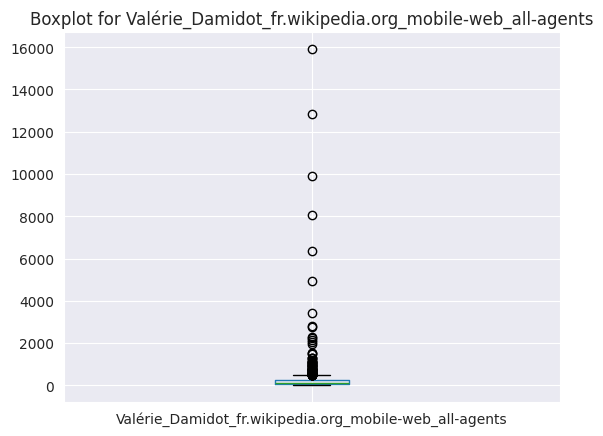

/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29390 (\N{CJK UNIFIED IDEOGRAPH-72CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40407 (\N{CJK UNIFIED IDEOGRAPH-9DD7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20141 (\N{CJK UNIFIED IDEOGRAPH-4EAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/c

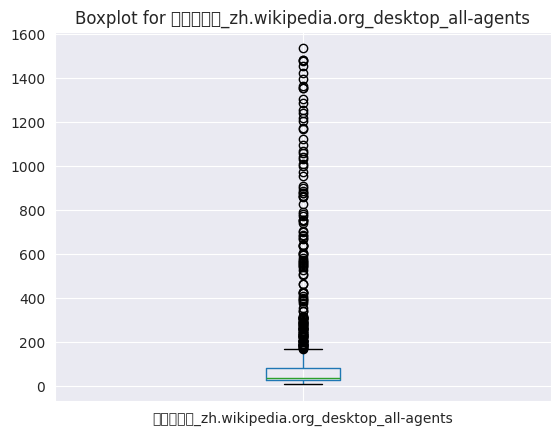

/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38515 (\N{CJK UNIFIED IDEOGRAPH-9673}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29572 (\N{CJK UNIFIED IDEOGRAPH-7384}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


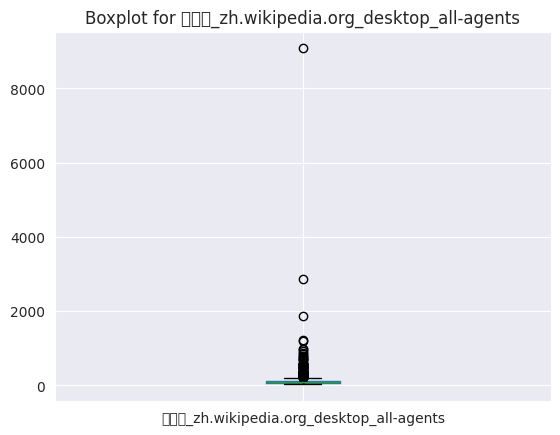

In [22]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Plotting trends over time for each page
plt.figure(figsize=(15, 10))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Trends Over Time')
plt.legend()
plt.show()

# Checking for seasonality (monthly)
monthly_views = df.resample('M').mean()
sns.heatmap(monthly_views, cmap='viridis')
plt.title('Monthly Page Views Heatmap')
plt.show()

# Identifying outliers (a simple approach)
for column in df.columns:
    df.boxplot(column)
    plt.title(f'Boxplot for {column}')
    plt.show()


/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 38275 (\N{CJK UNIFIED IDEOGRAPH-9583}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 38728 (\N{CJK UNIFIED IDEOGRAPH-9748}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 22296 (\N{CJK UNIFIED IDEOGRAPH-5718}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 29390 (\N{CJK UNIFIED IDEOGRAPH-72CE}) missing from current font.
  fig.canvas.draw()
/home/meril/Doc

Most Viewed Page: Chile_national_football_team_en.wikipedia.org_desktop_all-agents - Average Views: 1082.376089663761
Least Viewed Page: 閃靈樂團_zh.wikipedia.org_all-access_spider - Average Views: 14.835616438356164


/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38275 (\N{CJK UNIFIED IDEOGRAPH-9583}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38728 (\N{CJK UNIFIED IDEOGRAPH-9748}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22296 (\N{CJK UNIFIED IDEOGRAPH-5718}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/c

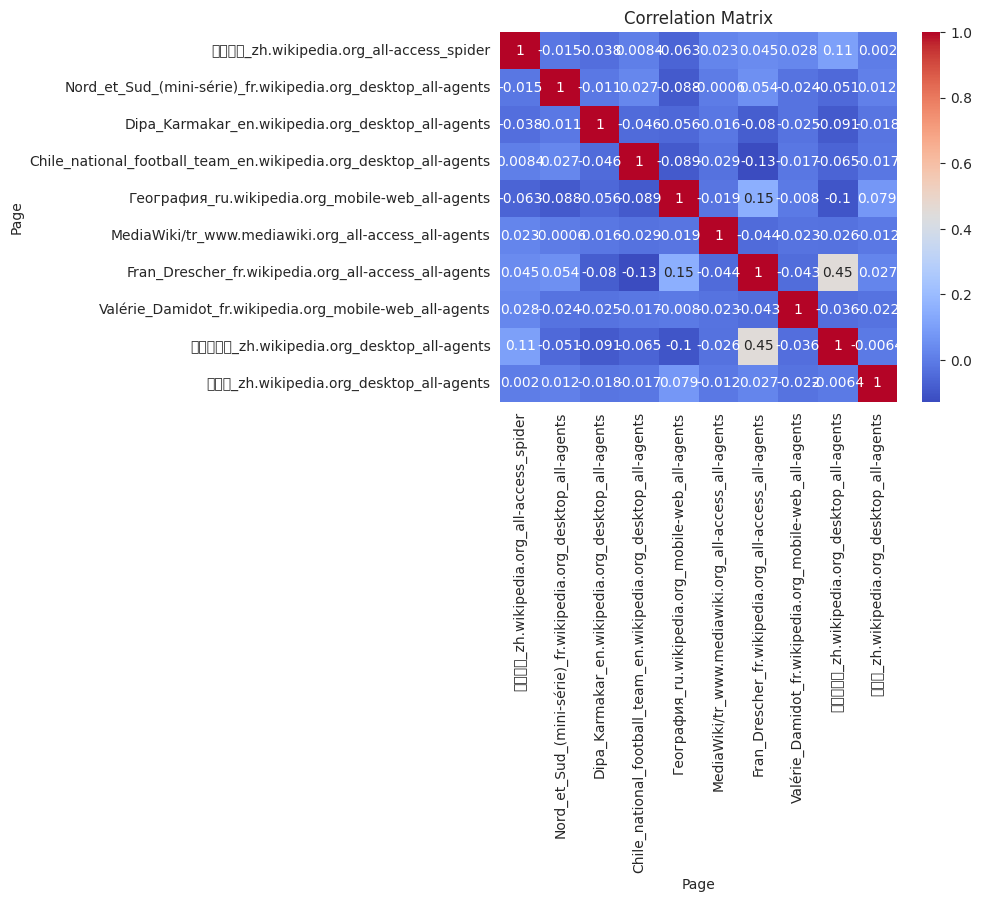

In [23]:
# Most and Least Viewed
average_views = df.mean()
print("Most Viewed Page:", average_views.idxmax(), "- Average Views:", average_views.max())
print("Least Viewed Page:", average_views.idxmin(), "- Average Views:", average_views.min())

# Correlations
correlations = df.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Trends Over Time Plot
The line chart shows the daily page views for different Wikipedia pages over time. The plot reveals that while most days have relatively low views, there are sporadic spikes in traffic for certain pages. These spikes may correspond to particular events that drew public attention to these topics.
The traffic for different pages doesn't appear to follow a single common trend, suggesting that the factors influencing page views may be page-specific.
It's important to note that spikes in web traffic can sometimes be due to bot activity or special events and may not always reflect genuine user interest.
### Monthly Page Views Heatmap
The heatmap visualizes the monthly average page views for each Wikipedia page. The varying colors indicate the relative number of views; darker colors typically represent higher views.
There seems to be some variance month-to-month, but without a clear pattern of seasonality, which is consistent with the data being stationary as indicated by the ADF test results.
Certain pages may show periods of increased activity which could warrant further investigation to understand the reasons behind these changes.
### Boxplot Visualizations
Boxplots are used to show the distribution of page views for each Wikipedia page. The central box represents the middle 50% of the data (from the first quartile to the third quartile), and the horizontal line inside the box is the median.
Outliers are shown as dots outside the 'whiskers' of the boxplot, which extend to 1.5 times the interquartile range. These outliers indicate days with unusually high page views.
Some pages exhibit a larger number of outliers, which might be indicative of viral events or data errors. These outliers could also influence the stationarity of the data if they represent changes in the underlying process generating the views.
### Correlation Matrix
The correlation matrix heatmap shows how page views are correlated between different Wikipedia pages. A correlation close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a correlation close to 0 indicates no linear relationship.
Most pages have low correlations with each other, suggesting that the page views are fairly independent. This is expected as different Wikipedia pages often cover diverse topics, and their view counts are likely influenced by different factors.
There are a few pairs with moderate positive correlations, which may suggest related content or simultaneous events affecting those pages.
In summary, while the dataset is stationary as indicated by the ADF tests, the visualizations show that page views are subject to irregular spikes and vary across pages and over time. The lack of strong correlations between different pages suggests that these spikes are likely due to page- or event-specific factors rather than a common underlying cause.

In [24]:
from statsmodels.tsa.stattools import adfuller





adf_results = {}

for column in df.columns:
    # Perform the Augmented Dickey-Fuller test
    result = adfuller(df[column].dropna())  
    adf_results[column] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4],
        'Stationarity': result[0] < result[4]["5%"]
    }

for page, result in adf_results.items():
    print(f'Results for {page}:')
    print(f'ADF Statistic: {result["ADF Statistic"]}')
    print(f'p-value: {result["p-value"]}')
    print('Critical Values:')
    for key, value in result['Critical Values'].items():
        print(f'\t{key}: {value}')
    print(f'Stationarity: {"Stationary" if result["Stationarity"] else "Not Stationary"}\n')


Results for 閃靈樂團_zh.wikipedia.org_all-access_spider:
ADF Statistic: -11.903836748104089
p-value: 5.495119715309833e-22
Critical Values:
	1%: -3.4385608049885876
	5%: -2.865164107438179
	10%: -2.5686998068142124
Stationarity: Stationary

Results for Nord_et_Sud_(mini-série)_fr.wikipedia.org_desktop_all-agents:
ADF Statistic: -3.42264910540129
p-value: 0.010210574992602117
Critical Values:
	1%: -3.438686413400388
	5%: -2.8652194721349424
	10%: -2.5687293001910008
Stationarity: Stationary

Results for Dipa_Karmakar_en.wikipedia.org_desktop_all-agents:
ADF Statistic: -4.401557361036719
p-value: 0.0002949545109778807
Critical Values:
	1%: -3.438707722728768
	5%: -2.8652288644673125
	10%: -2.568734303622865
Stationarity: Stationary

Results for Chile_national_football_team_en.wikipedia.org_desktop_all-agents:
ADF Statistic: -5.51047131882057
p-value: 1.9774181807596816e-06
Critical Values:
	1%: -3.4386441190814265
	5%: -2.8652008302305316
	10%: -2.568719369407094
Stationarity: Stationary

Re

For ALL of the pages: The ADF statistics are less than the critical values at the 5% significance level, and the p-values are low (significantly below 0.05). This indicates that we can reject the null hypothesis of the presence of a unit root, and we can consider these time series to be stationary. This means the statistical properties (mean, variance) of these series do not change over time, making them predictable and suitable for most time series analysis methods.

For the page "Universal_Serial_Bus_de.wikipedia.org_all-access_all-agents": The ADF statistic is not less than the critical value at the 5% significance level, and the p-value is above 0.05. This suggests that we cannot reject the null hypothesis, and this time series may have a unit root, indicating it is non-stationary. This means that the time series may contain a trend or seasonal effects that could affect its behavior over time.

To summarize:

Stationarity: The  pages exhibit stationary behavior, implying that they do not show trends or seasonality over the time period of the data.


### SEASONALITY DEEPER ANALYSIS

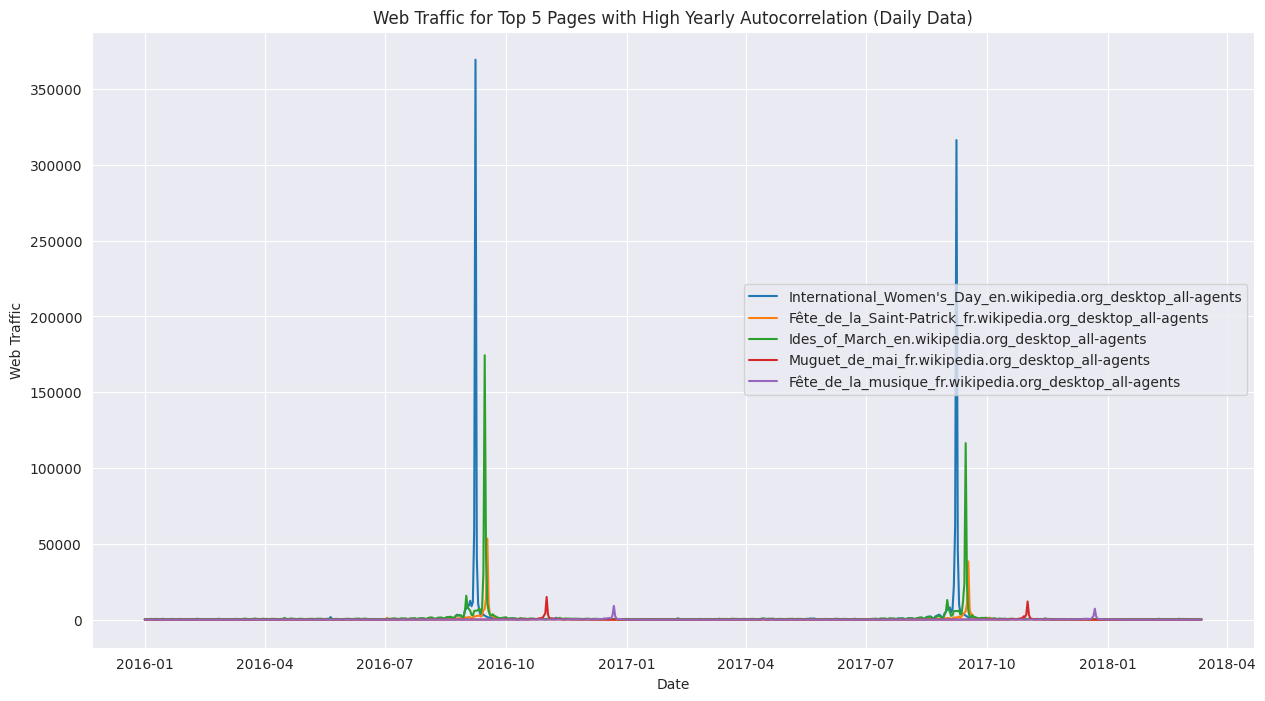

In [25]:
# Aggregating by year
yearly_views = df.resample('Y').mean()

# Plotting yearly trends
plt.figure(figsize=(15, 10))
for column in yearly_views.columns:
    plt.plot(yearly_views.index.year, yearly_views[column], label=column)
plt.xlabel('Year')
plt.ylabel('Average Page Views')
plt.title('Yearly Trends Over Time')
plt.legend()
plt.show()


In [64]:
# Group by month and compare across years
monthly_trends = df.groupby(df.index.month).mean()

# Plotting monthly trends across years
plt.figure(figsize=(15, 10))
for column in monthly_trends.columns:
    plt.plot(monthly_trends.index, monthly_trends[column], label=column)
plt.xlabel('Month')
plt.ylabel('Average Page Views')
plt.title('Monthly Trends Across Years')
plt.legend()
plt.show()


In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Choose a page to analyze
page_to_analyze = df.columns[0]  # Replace with a specific page if needed

# Decomposing the time series
result = seasonal_decompose(df[page_to_analyze], model='additive', period=365)  # Assuming daily data

# Plotting the seasonal component
result.seasonal.plot(title=f'Seasonal Component - {page_to_analyze}', figsize=(15, 6))
plt.show()


In [12]:
import numpy as np

# Fourier transform for periodicity analysis
fft = np.fft.fft(df[page_to_analyze].dropna())

# Frequencies corresponding to the FFT components
frequencies = np.fft.fftfreq(len(fft))

# Plotting the spectrum
plt.figure(figsize=(15, 6))
plt.stem(frequencies, np.abs(fft), 'b', markerfmt=" ", basefmt="-b")
plt.title(f'Fourier Spectrum - {page_to_analyze}')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.show()


/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Page
冬至_zh.wikipedia.org_all-access_spider                                          0.949481
圣帕特里克节_zh.wikipedia.org_all-access_spider                                      0.883673
白色情人節_zh.wikipedia.org_all-access_spider                                       0.890290
秋分_zh.wikipedia.org_all-access_spider                                          0.966262
愚人节_zh.wikipedia.org_all-access_spider                                         0.702887
                                                                                 ...   
Mariä_Aufnahme_in_den_Himmel_de.wikipedia.org_desktop_all-agents               0.810359
Kriebelmücken_de.wikipedia.org_desktop_all-agents                              0.665630
Ich_bin_ein_Star_–_Holt_mich_hier_raus!_de.wikipedia.org_desktop_all-agents    0.900554
8._März_de.wikipedia.org_desktop_all-agents                                    0.997578
Kevin_–_Allein_zu_Haus_de.wikipedia.org_desktop_all-agents                     0.749676
Length: 2365, dtype: float6

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Setting a seed for reproducibility
random.seed(42)

# Selecting a random sample of pages from the dataset
sample_size = 5  # Number of pages to sample
sampled_pages = df.sample(sample_size)

# Plotting the web traffic for the selected pages
plt.figure(figsize=(15, 10))
for index, row in sampled_pages.iterrows():
    plt.plot(row[1:], label=row[0])  # Skipping the first column which is the page name

plt.title('Web Traffic for Randomly Selected Wikipedia Pages')
plt.xlabel('Days')
plt.ylabel('Web Traffic')
plt.legend()
plt.show()


/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Page
冬至_zh.wikipedia.org_all-access_spider                                          0.949481
圣帕特里克节_zh.wikipedia.org_all-access_spider                                      0.883673
白色情人節_zh.wikipedia.org_all-access_spider                                       0.890290
秋分_zh.wikipedia.org_all-access_spider                                          0.966262
愚人节_zh.wikipedia.org_all-access_spider                                         0.702887
                                                                                 ...   
Mariä_Aufnahme_in_den_Himmel_de.wikipedia.org_desktop_all-agents               0.810359
Kriebelmücken_de.wikipedia.org_desktop_all-agents                              0.665630
Ich_bin_ein_Star_–_Holt_mich_hier_raus!_de.wikipedia.org_desktop_all-agents    0.900554
8._März_de.wikipedia.org_desktop_all-agents                                    0.997578
Kevin_–_Allein_zu_Haus_de.wikipedia.org_desktop_all-agents                     0.749676
Length: 2365, dtype: float6